In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [19]:
def convert_log_to_csv(fpath):
    df = pd.DataFrame(columns=['ep_len_mean', 'ep_rew_mean', 'total_timesteps'])
    with open(fpath, 'r') as f:
        lines = f.readlines()
        while len(lines) > 0:
            line = lines.pop(0)
            if 'ep_len_mean' in line:
                ep_len_mean = line.strip().split('|')[-2].strip()
                ep_rew_mean = lines.pop(0).strip().split('|')[-2].strip()
                # change the string to float
                # If the value is like 1e-05, translate it to 0.00001
                ep_len_mean = float(ep_len_mean) if 'e' not in ep_len_mean else float(ep_len_mean.replace('e', 'E'))
                ep_rew_mean = float(ep_rew_mean) if 'e' not in ep_rew_mean else float(ep_rew_mean.replace('e', 'E'))
            if 'total_timesteps' in line:
                total_timesteps = line.strip().split('|')[-2].strip()
                total_timesteps = int(total_timesteps)
                df = pd.concat([df, pd.DataFrame([[ep_len_mean, ep_rew_mean, total_timesteps]], columns=['ep_len_mean', 'ep_rew_mean', 'total_timesteps'])])
    return df
        

In [21]:
naive_dqn_static_df = convert_log_to_csv('training_log/sb3_naive_dqn_static.txt')
naive_dqn_dynamic_df = convert_log_to_csv('training_log/sb3_naive_dqn_dynamic.txt')
promes_dqn_static_df = convert_log_to_csv('training_log/sb3_promes_dqn_static.txt')
promes_dqn_dynamic_df = convert_log_to_csv('training_log/sb3_promes_dqn_dynamic.txt')
promes_ppo_static_df = convert_log_to_csv('training_log/sb3_promes_ppo_static.txt')
promes_ppo_dynamic_df = convert_log_to_csv('training_log/sb3_promes_ppo_dynamic.txt')

In [8]:
convert_log_to_csv('training_log/sb3_naive_dqn_static.txt')

['Using cpu device\n', 'Wrapping the env with a `Monitor` wrapper\n', 'Wrapping the env in a DummyVecEnv.\n', '----------------------------------\n', '| rollout/            |          |\n', '|    ep_len_mean      | 1.3e+03  |\n', '|    ep_rew_mean      | 966      |\n', '|    exploration_rate | 0.836    |\n', '| time/               |          |\n', '|    episodes         | 4        |\n', '|    fps              | 62       |\n', '|    time_elapsed     | 83       |\n', '|    total_timesteps  | 5186     |\n', '----------------------------------\n', '----------------------------------\n', '| rollout/            |          |\n', '|    ep_len_mean      | 1.29e+03 |\n', '|    ep_rew_mean      | 974      |\n', '|    exploration_rate | 0.673    |\n', '| time/               |          |\n', '|    episodes         | 8        |\n', '|    fps              | 63       |\n', '|    time_elapsed     | 163      |\n', '|    total_timesteps  | 10330    |\n', '----------------------------------\n', '---------

Text(0, 0.5, 'ep_rew_mean')

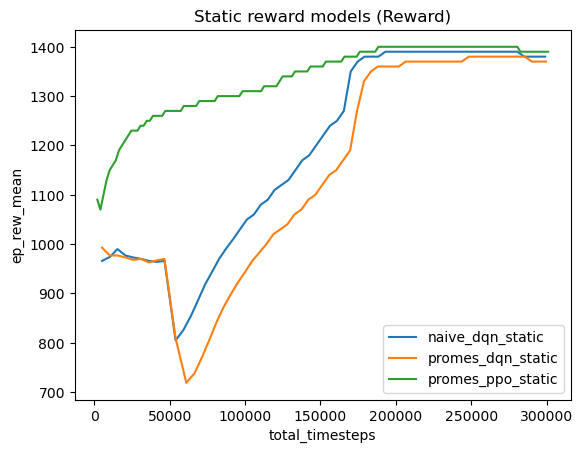

In [28]:
# Compare the performance of static reward models (naive_dqn, promes_dqn, promes_ppo)
# Using seaborn chart
sns.lineplot(data=naive_dqn_static_df, x='total_timesteps', y='ep_rew_mean', label='naive_dqn_static')
sns.lineplot(data=promes_dqn_static_df, x='total_timesteps', y='ep_rew_mean', label='promes_dqn_static')
sns.lineplot(data=promes_ppo_static_df, x='total_timesteps', y='ep_rew_mean', label='promes_ppo_static')
plt.title('Static reward models (Reward)')
plt.xlabel('total_timesteps')
plt.ylabel('ep_rew_mean')

Text(0, 0.5, 'ep_len_mean')

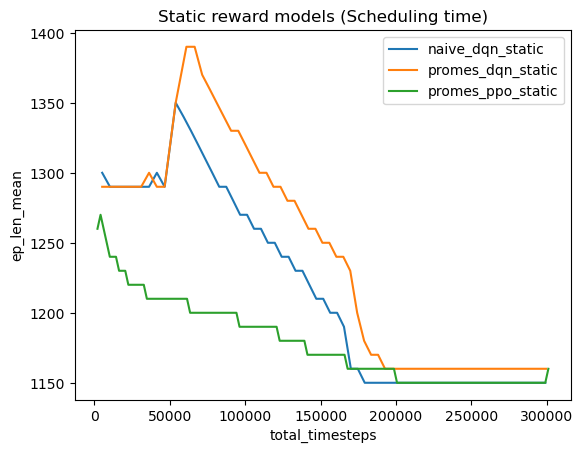

In [29]:
# Compare the performance of static reward models (naive_dqn, promes_dqn, promes_ppo)
# Using seaborn chart
sns.lineplot(data=naive_dqn_static_df, x='total_timesteps', y='ep_len_mean', label='naive_dqn_static')
sns.lineplot(data=promes_dqn_static_df, x='total_timesteps', y='ep_len_mean', label='promes_dqn_static')
sns.lineplot(data=promes_ppo_static_df, x='total_timesteps', y='ep_len_mean', label='promes_ppo_static')
plt.title('Static reward models (Scheduling time)')
plt.xlabel('total_timesteps')
plt.ylabel('ep_len_mean')

Text(0, 0.5, 'ep_rew_mean')

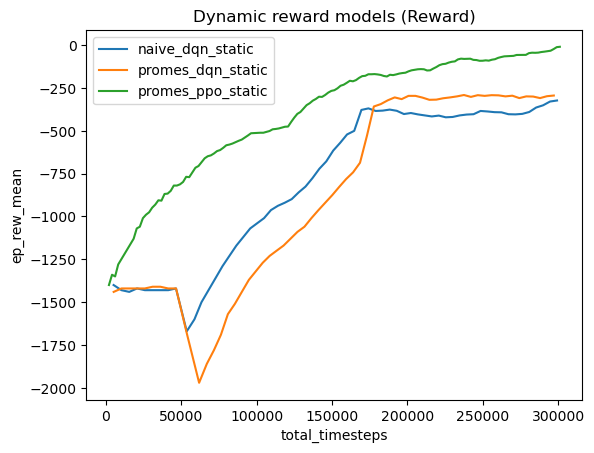

In [30]:
# Compare the performance of static reward models (naive_dqn, promes_dqn, promes_ppo)
# Using seaborn chart
sns.lineplot(data=naive_dqn_dynamic_df, x='total_timesteps', y='ep_rew_mean', label='naive_dqn_static')
sns.lineplot(data=promes_dqn_dynamic_df, x='total_timesteps', y='ep_rew_mean', label='promes_dqn_static')
sns.lineplot(data=promes_ppo_dynamic_df, x='total_timesteps', y='ep_rew_mean', label='promes_ppo_static')
plt.title('Dynamic reward models (Reward)')
plt.xlabel('total_timesteps')
plt.ylabel('ep_rew_mean')

Text(0, 0.5, 'ep_len_mean')

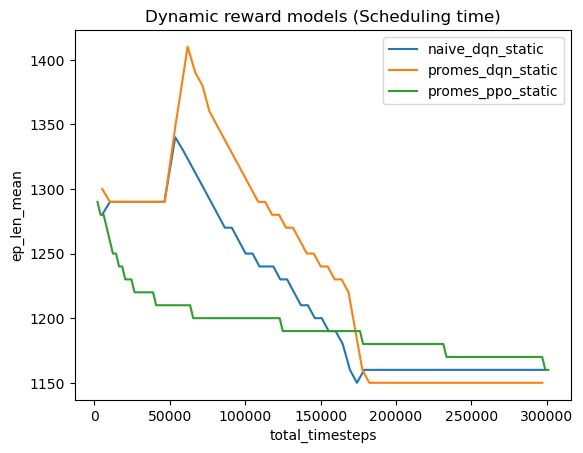

In [31]:
# Compare the performance of static reward models (naive_dqn, promes_dqn, promes_ppo)
# Using seaborn chart
sns.lineplot(data=naive_dqn_dynamic_df, x='total_timesteps', y='ep_len_mean', label='naive_dqn_static')
sns.lineplot(data=promes_dqn_dynamic_df, x='total_timesteps', y='ep_len_mean', label='promes_dqn_static')
sns.lineplot(data=promes_ppo_dynamic_df, x='total_timesteps', y='ep_len_mean', label='promes_ppo_static')
plt.title('Dynamic reward models (Scheduling time)')
plt.xlabel('total_timesteps')
plt.ylabel('ep_len_mean')